In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
def log (n1, n2,n3,m1, m2,m3,Cov1,Cov2,Cov3,num):
    #用多變量常態生成資料
    mvn1 = multivariate_normal(mean = m1, cov = Cov1)
    mvn2 = multivariate_normal(mean = m2, cov = Cov2)
    mvn3 = multivariate_normal(mean = m3, cov = Cov3)
    A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
    X = np.vstack((A, B, C))

    y2=[] 
    for i in range(200):
        y2.append(2)

    y = np.hstack((np.zeros(n1), np.ones(n2), y2 ))
    np.savetxt("demo_data.txt", np.c_[X, y],\
    fmt = "%.4f %.4f %d", header = "X1 X2 X3 y")
    #print(y)
    colors = ["red" if i == 0 else "green" if i==1 else "blue" for i in y]
    plt.scatter(X[:, 0], X[:, 1], \
    c=colors, s=30, marker="o")
    plt.grid(True)
    plt.show()

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg = LogisticRegression(C=1e5)
    logreg.fit(X, y)

    _, ax = plt.subplots(figsize=(6, 4))
    DecisionBoundaryDisplay.from_estimator(
        logreg,
        X,
        cmap=plt.cm.tab20b,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        eps=0.5,
    )
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Set3)
    plt.grid(True)
    plt.savefig('G:/碩班/統計與數學應用/W9ImgOut/logistic_%d.png'%num ,format='png')
    plt.show()
    print(logreg.score(X,y))

#pip install --user -U scikit-learn

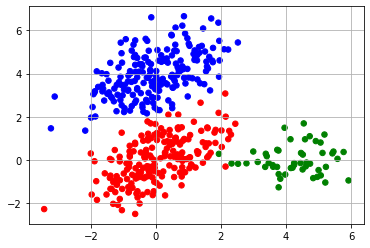

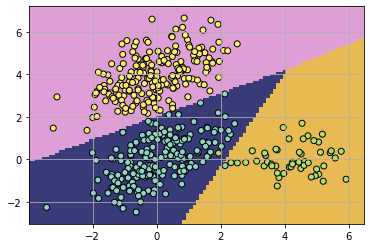

0.9955555555555555


In [5]:
#生成資料_量
n1, n2,n3 = 200, 50 ,200
m1, m2,m3 = np.array([0, 0]), np.array([4, 0]),np.array([0, 4])
Cov1 = np.array([[1, 0.5], [0.5, 1]])
Cov2 = np.array([[1, 0.5], [0.5, 1]])
Cov3 = np.array([[1, 0.5], [0.5, 1]])
log (n1, n2,n3,m1, m2,m3,Cov1,Cov2,Cov3,1)

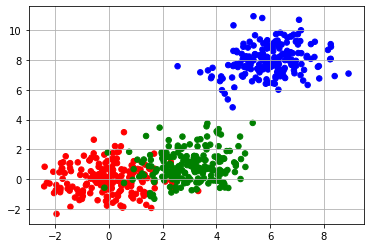

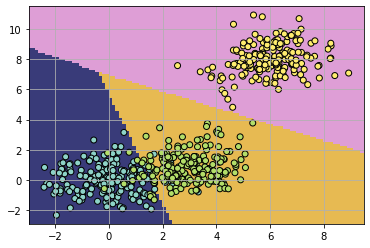

0.9483333333333334


In [9]:
#生成資料_距離
n1, n2,n3 = 200, 200 ,200
m1, m2,m3 = np.array([0, 0]), np.array([3, 1]),np.array([6, 8])
Cov1 = np.array([[1, 0.2], [0.2, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
Cov3 = np.array([[1, 0.2], [0.2, 1]])
log (n1, n2,n3,m1, m2,m3,Cov1,Cov2,Cov3,2)

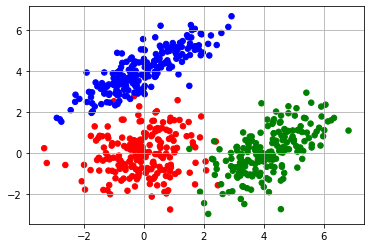

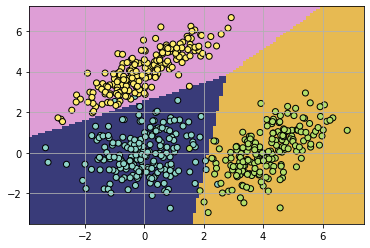

0.99


In [10]:
#生成資料_變異
n1, n2,n3 = 200, 200 ,200
m1, m2,m3 = np.array([0, 0]), np.array([4, 0]),np.array([0, 4])
Cov1 = np.array([[1, 0.2], [0.2, 1]])
Cov2 = np.array([[1, 0.5], [0.5, 1]])
Cov3 = np.array([[1, 0.8], [0.8, 1]])
log (n1, n2,n3,m1, m2,m3,Cov1,Cov2,Cov3,3)

0.31577645171643687
[-0.01483614  0.26046899]
accuracy in training for linear regression:     75.0000%
accuracy in testing for linear regression:     65.0000%
0.20691639202028472
[ 0.17341259  0.49624268 -0.1230091  -0.03634206 -0.08345965]
accuracy in training for linear regression:     76.8750%
accuracy in testing for linear regression:     60.0000%


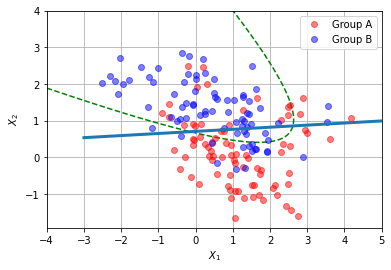

In [29]:

# 1. load data
data_dir = "g:/碩班/統計與數學應用/ml_data/"
D = np.loadtxt(data_dir +'la_3.txt', comments='%')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
'''
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
colors = ['red' if i == 0 else 'blue' for i in D_trian[:,2]]
#colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D_trian[:, 0], D_trian[:, 1], c = colors, s = s, \
marker = 'o', alpha = 0.5)
plt.grid(True)
plt.savefig('G:/碩班/統計與數學應用/W9ImgOut/la3.png', format='png')
plt.show()
'''
#------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
#------------------------------

# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#-------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-4,5, 100)
yy = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')

plt.savefig('la3_evaluate.png', format='png')
#plt.show()


0.8665658029969849
[-0.1500907   0.02904892]
accuracy in training for linear regression:     91.2500%
accuracy in testing for linear regression:     90.0000%
0.7677329400254943
[-0.05049974  0.1331737  -0.00734126 -0.01645125 -0.01675206]
accuracy in training for linear regression:     96.2500%
accuracy in testing for linear regression:     85.0000%


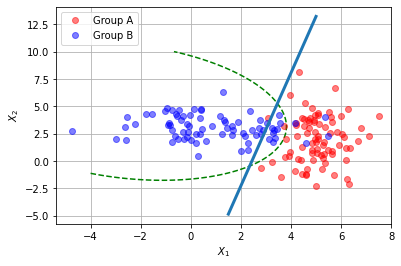

In [206]:
# 1. load data
data_dir = "g:/碩班/統計與數學應用/ml_data/"
D = np.loadtxt(data_dir +'la_2.txt', comments='%')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)

#------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
#------------------------------

# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([1.5, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
#plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#---------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-4,8, 100)
yy = np.linspace(-2, 10, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('la2_evaluate.png', format='png')
plt.show()


0.7302617816318604
[-0.14861078  0.08965549]
accuracy in training for linear regression:     95.6250%
accuracy in testing for linear regression:     87.5000%
0.738093516247328
[-0.21976699  0.14195051 -0.00478148  0.01149067 -0.00953093]
accuracy in training for linear regression:     94.3750%
accuracy in testing for linear regression:     90.0000%


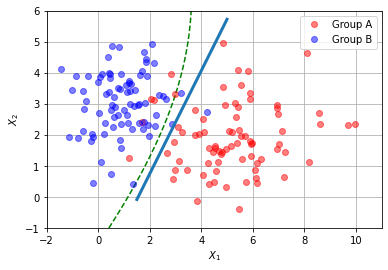

In [26]:
# 1. load data
data_dir = "g:/碩班/統計與數學應用/ml_data/"
D = np.loadtxt(data_dir +'la_1.txt', comments='%')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
#------------------------------

# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([1.5, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,11, 100)
yy = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('la1_evaluate.png', format='png')
plt.show()


0.09906664010230781
[ 0.20161793 -0.00857052]
accuracy in training for linear regression:     97.8125%
accuracy in testing for linear regression:     97.5000%
0.11515643884275939
[ 0.21309923  0.00728909 -0.00040361 -0.00261782 -0.0167808 ]
accuracy in training for aug regression:     98.1250%
accuracy in testing for aug regression:     96.2500%


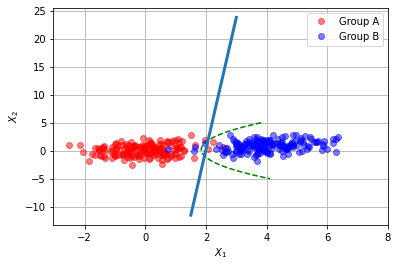

In [25]:
#評比_資料遠,變異大
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_1.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ["red" if i == 0 else "blue" for i in y]
#------------------------------
# 1. load data
D = np.loadtxt('E:/統計應用/demo_data_1.txt')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#--------------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")

#------------------------------
# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([1.5, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for aug regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for aug regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,8, 100)
yy = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('資料遠變異大.png', format='png')
plt.show()



0.231077052387833
[0.2084123  0.09073162]
accuracy in training for linear regression:     85.3125%
accuracy in testing for linear regression:     85.0000%
0.23619281776395312
[ 0.20773616  0.06887576  0.01912883 -0.00253806 -0.00553712]
accuracy in training for linear regression:     85.6250%
accuracy in testing for linear regression:     86.2500%


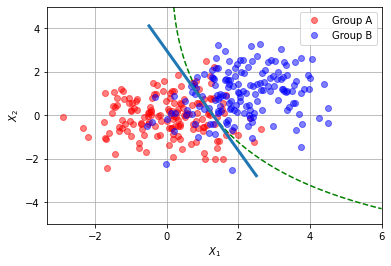

In [165]:
#評比_資料近
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_2.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ["red" if i == 0 else "blue" for i in y]
#------------------------------
# 1. load data
D = np.loadtxt('E:/統計應用/demo_data_2.txt')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#--------------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")

#------------------------------
# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([-0.5,2.5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,6, 100)
yy = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('資料近.png', format='png')
plt.show()



0.06419274137260478
[ 0.26064027 -0.16917741]
accuracy in training for linear regression:     100.0000%
accuracy in testing for linear regression:     100.0000%
0.06120532722269251
[ 0.28345303 -0.18866899  0.00682688 -0.00643346  0.00407784]
accuracy in training for linear regression:     100.0000%
accuracy in testing for linear regression:     98.7500%


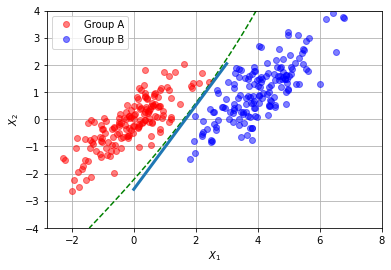

In [193]:
#評比_變異小
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0.8], [0.8, 1]])
Cov2 = np.array([[1, 0.7], [0.7, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_3.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ["red" if i == 0 else "blue" for i in y]
#------------------------------
# 1. load data
D = np.loadtxt('E:/統計應用/demo_data_3.txt')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#--------------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")

#------------------------------
# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,8, 100)
yy = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('變異小.png', format='png')
plt.show()



0.13168949478718284
[0.17585072 0.11133574]
accuracy in training for linear regression:     95.0000%
accuracy in testing for linear regression:     96.0000%
0.14483853207792613
[ 0.17862622  0.1169761   0.00760865 -0.0033586  -0.00950896]
accuracy in training for linear regression:     95.1250%
accuracy in testing for linear regression:     96.0000%


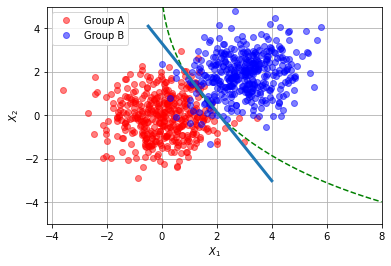

In [205]:
#評比_資料量大
n1, n2 = 500, 500
m1, m2 = np.array([0, 0]), np.array([3, 2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_4.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ["red" if i == 0 else "blue" for i in y]
#------------------------------
# 1. load data
D = np.loadtxt('E:/統計應用/demo_data_4.txt')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#--------------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")

#------------------------------
# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([-0.5, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,8, 100)
yy = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('資料量大.png', format='png')
plt.show()



0.12426083145712102
[0.19327425 0.08886648]
accuracy in training for linear regression:     92.5000%
accuracy in testing for linear regression:     95.0000%
0.15534701381925786
[ 0.24561809  0.08431902  0.0258697  -0.02139656 -0.02346643]
accuracy in training for linear regression:     92.5000%
accuracy in testing for linear regression:     95.0000%


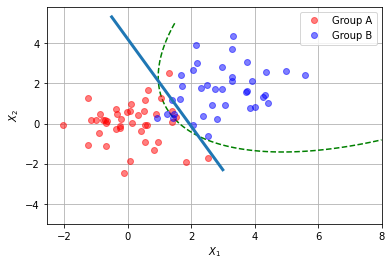

In [211]:
#評比_資料量小
n1, n2 = 50, 50
m1, m2 = np.array([0, 0]), np.array([3, 2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_5.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ["red" if i == 0 else "blue" for i in y]
#------------------------------
# 1. load data
D = np.loadtxt('E:/統計應用/demo_data_5.txt')
D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
#--------------------------------------
Idx = (D_trian[:,2]==0)
plt.plot(D_trian[Idx, 0], D_trian[Idx, 1], "ro",\
alpha = 0.5, label = "Group A")
Idx = (D_trian[:,2]==1)
plt.plot(D_trian[Idx,0], D_trian[Idx,1],"bo", \
alpha = 0.5, label = "Group B")
plt.legend(), plt.grid(True)
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")

#------------------------------
# 3. Estimate the coefficients (配合下面程式碼)
n = len(D_trian[:, 0])
X = D_trian[:,0:2]
y = D_trian[:,2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# # R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# Draw a regression line
x = np.array([-0.5, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title(”Accuracy in training is {:.2f}”.format( \
# 100 * np.mean(y_pre == y)))
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
# plt.xlabel(”$X_1$”), plt.ylabel(”$X_2$”)

# # Calculate testing error
X_test = D_test[:,0:2]
y_test = D_test[:,2]
y_hat = Mdl.predict(X_test) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y_test)))

#------------------------------------------
# Augmented regression line by a contour line at 0.5
x1 = D_trian[:, 0:1] # n x 1 vector
x2 = D_trian[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_trian[:,2]
n = len(y)

# Augmented Regression Model by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(intrcp)
print(coeffs)

# # Calculate trianing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in training for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))

# # Calculate testing error
x1 = D_test[:, 0:1] # n x 1 vector
x2 = D_test[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D_test[:,2]
n = len(y)

y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("accuracy in testing for linear regression: \
    {:.4f}%".format(100 * np.mean(y_pre == y)))
    
#------Draw count plot---------------------------
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(-2,8, 100)
yy = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(
X, Y, Z, levels = [0.5], colors='g', linestyles='--')
plt.savefig('資料量小.png', format='png')
plt.show()

